In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

In [3]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

In [4]:
data = loaddata('C:/Users/dbatists/Documents/datasets/ex2data1.txt', ',')

Dimensions:  (100, 3)
[[30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]]


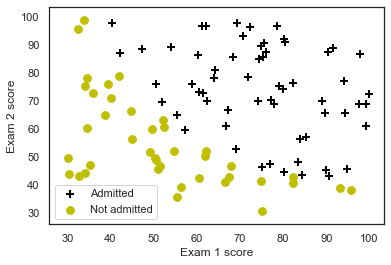

In [5]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

In [13]:
X = np.c_[np.ones((data.shape[0], 1)), data[:, 0:2]]
y = np.c_[data[:,2]]


print('My X values {0}'.format(X))
print('My y values {0}'.format(y))


My X values [[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.        

### Logistic regression hypothesis

\begin{align}
    h_{\theta}(x) = g(\theta^{T}x)
\end{align}

\begin{align}
    g(z)=\frac{1}{1+e^{−z}}
\end{align}

In [7]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

### Cost Function

\begin{align}
    J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]
\end{align}

### Vectorized Cost Function

\begin{align}
    J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)
\end{align}

In [38]:
def costFunction(theta, X, y):
    m = y.shape[0]
    h = sigmoid(X.dot(theta)) #Returning my hypothesis
    
    J = -1 * (1/m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y)) #Vectorized form
    
    if np.isnan(J[0]):
        return (np.inf)
    return(J[0])

## Gradient

#### Partial derivative
\begin{align}
    \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j}
\end{align}


#### Vectorized

\begin{align}
    \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)
\end{align}

In [17]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    
    grad = (1/m) * X.T.dot(h-y)
    
    return(grad.flatten())

###  Documentation

#### How to use zeros matrix
https://docs.scipy.org/doc/numpy/reference/generated/numpy.matlib.zeros.html#numpy.matlib.zeros

#### Matrixes product
https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

#### optimize.minimize
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

In [19]:
initial_theta = np.zeros(X.shape[1]) 
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)

print('Initial theta {0}'.format(initial_theta))
print('Reshape {0}'.format(initial_theta.reshape(-1, 1).shape))
print('Without reshape {0}'.format(initial_theta.shape))
print('X.shape[1] {0}'.format(X.shape[1]))

print('\n')

print('Cost \n', cost)
print('Grad \n', grad)

Showning my theta J [0.69314718]
Initial theta [0. 0. 0.]
Reshape (3, 1)
Without reshape (3,)
X.shape[1] 3


Cost 
 0.6931471805599452
Grad 
 [ -0.1        -12.00921659 -11.26284221]


## Predictions

In [20]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

#### Minimize - A gradient descent

In [36]:
res = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})
res

Showning my theta J [0.69314718]
Showning my theta J [nan]
Showning my theta J [0.69314718]
Showning my theta J [0.69314718]
Showning my theta J [nan]
Showning my theta J [nan]
Showning my theta J [7.60753303]
Showning my theta J [1.44570762]
Showning my theta J [0.64117994]
Showning my theta J [1.33201144]
Showning my theta J [0.63875587]
Showning my theta J [0.63423132]
Showning my theta J [0.62625709]
Showning my theta J [0.61374421]
Showning my theta J [0.59836861]
Showning my theta J [0.5758948]
Showning my theta J [0.5362825]
Showning my theta J [0.46873125]
Showning my theta J [0.36703706]
Showning my theta J [0.29331834]
Showning my theta J [0.24761347]
Showning my theta J [0.21999214]
Showning my theta J [0.20755332]
Showning my theta J [0.20400504]
Showning my theta J [0.20351984]
Showning my theta J [0.20349863]
Showning my theta J [0.20349819]
Showning my theta J [0.20349795]
Showning my theta J [0.20349778]
Showning my theta J [0.20349772]
Showning my theta J [0.2034977]
S

C:\Users\dbatists\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\dbatists\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


      fun: 0.20349770158950983
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557631e-09,  4.36433478e-07, -1.39671758e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

In [37]:
p = predict(res.x, X)

In [33]:
print('Train accuracy {}%'.format(100 * sum((p == y.ravel()) /p.size)))

Train accuracy 89.00000000000006%


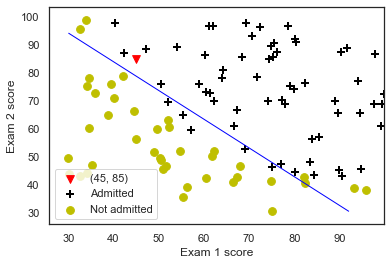

In [43]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')

In [53]:
xx1.ravel()

array([30.05882245, 31.48268031, 32.90653818, ..., 96.98014207,
       98.40399993, 99.8278578 ])